<a href="https://colab.research.google.com/github/6X10/Advanced-Statistical-Data-Analysis/blob/Implementation/Practice_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(4242)

In [ ]:
# data generation set-up
# we will assume that our data is sampled from 3 Gaussians

pi_true = np.array([0.2,0.5,0.3]) #2:3:5 비율로 각 가우시안에서 데이터 추출할 것
mu_true = np.array([[2,2],[-1,-1],[0,-1.4]]) #각 가우시안 분포의 mu 값
sigma_true = np.zeros((3,2,2)) #각 가우시안 분포의 sigma 값
sigma_true[0] = np.array([[1.,0.3],[0.2,0.2]])
sigma_true[1] = np.array([[0.5,0.8],[0.8,0.5]])
sigma_true[2] = np.array([[1.3,0.3],[0.2,0.4]])

#우리는 어디서 데이터 생성됐는지 아니까, 이를 표현하기 위해서 색 지정
colors = sns.color_palette("husl",8)
col = [colors[0],colors[1],colors[3],colors[5],colors[7]] #3개의 가우시안에서 뽑았지만, 5개의 cluster 가정할 것. 이를 활용해서 plotting
cols = ['b','g','r']

In [ ]:
# generate N=100 data instances

N = 100 #데이터 개수
data = np.zeros((N,3)) #X,Y,true color(실제로 어떤 가우시안 분포에서 나왔는지)

In [ ]:
# data generation

for i in range(N):
    z = np.random.random()
    idx = 0
    interval = 0

    for j in range(len(pi_true)):
        if z >= interval and z <= interval+pi_true[j]:
            idx = j
            break
        else:
            interval += pi_true[j]

    x, y = np.random.multivariate_normal(mu_true[idx],sigma_true[idx])
    data[i] = (x,y,idx)

/home/aailab/es345/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app


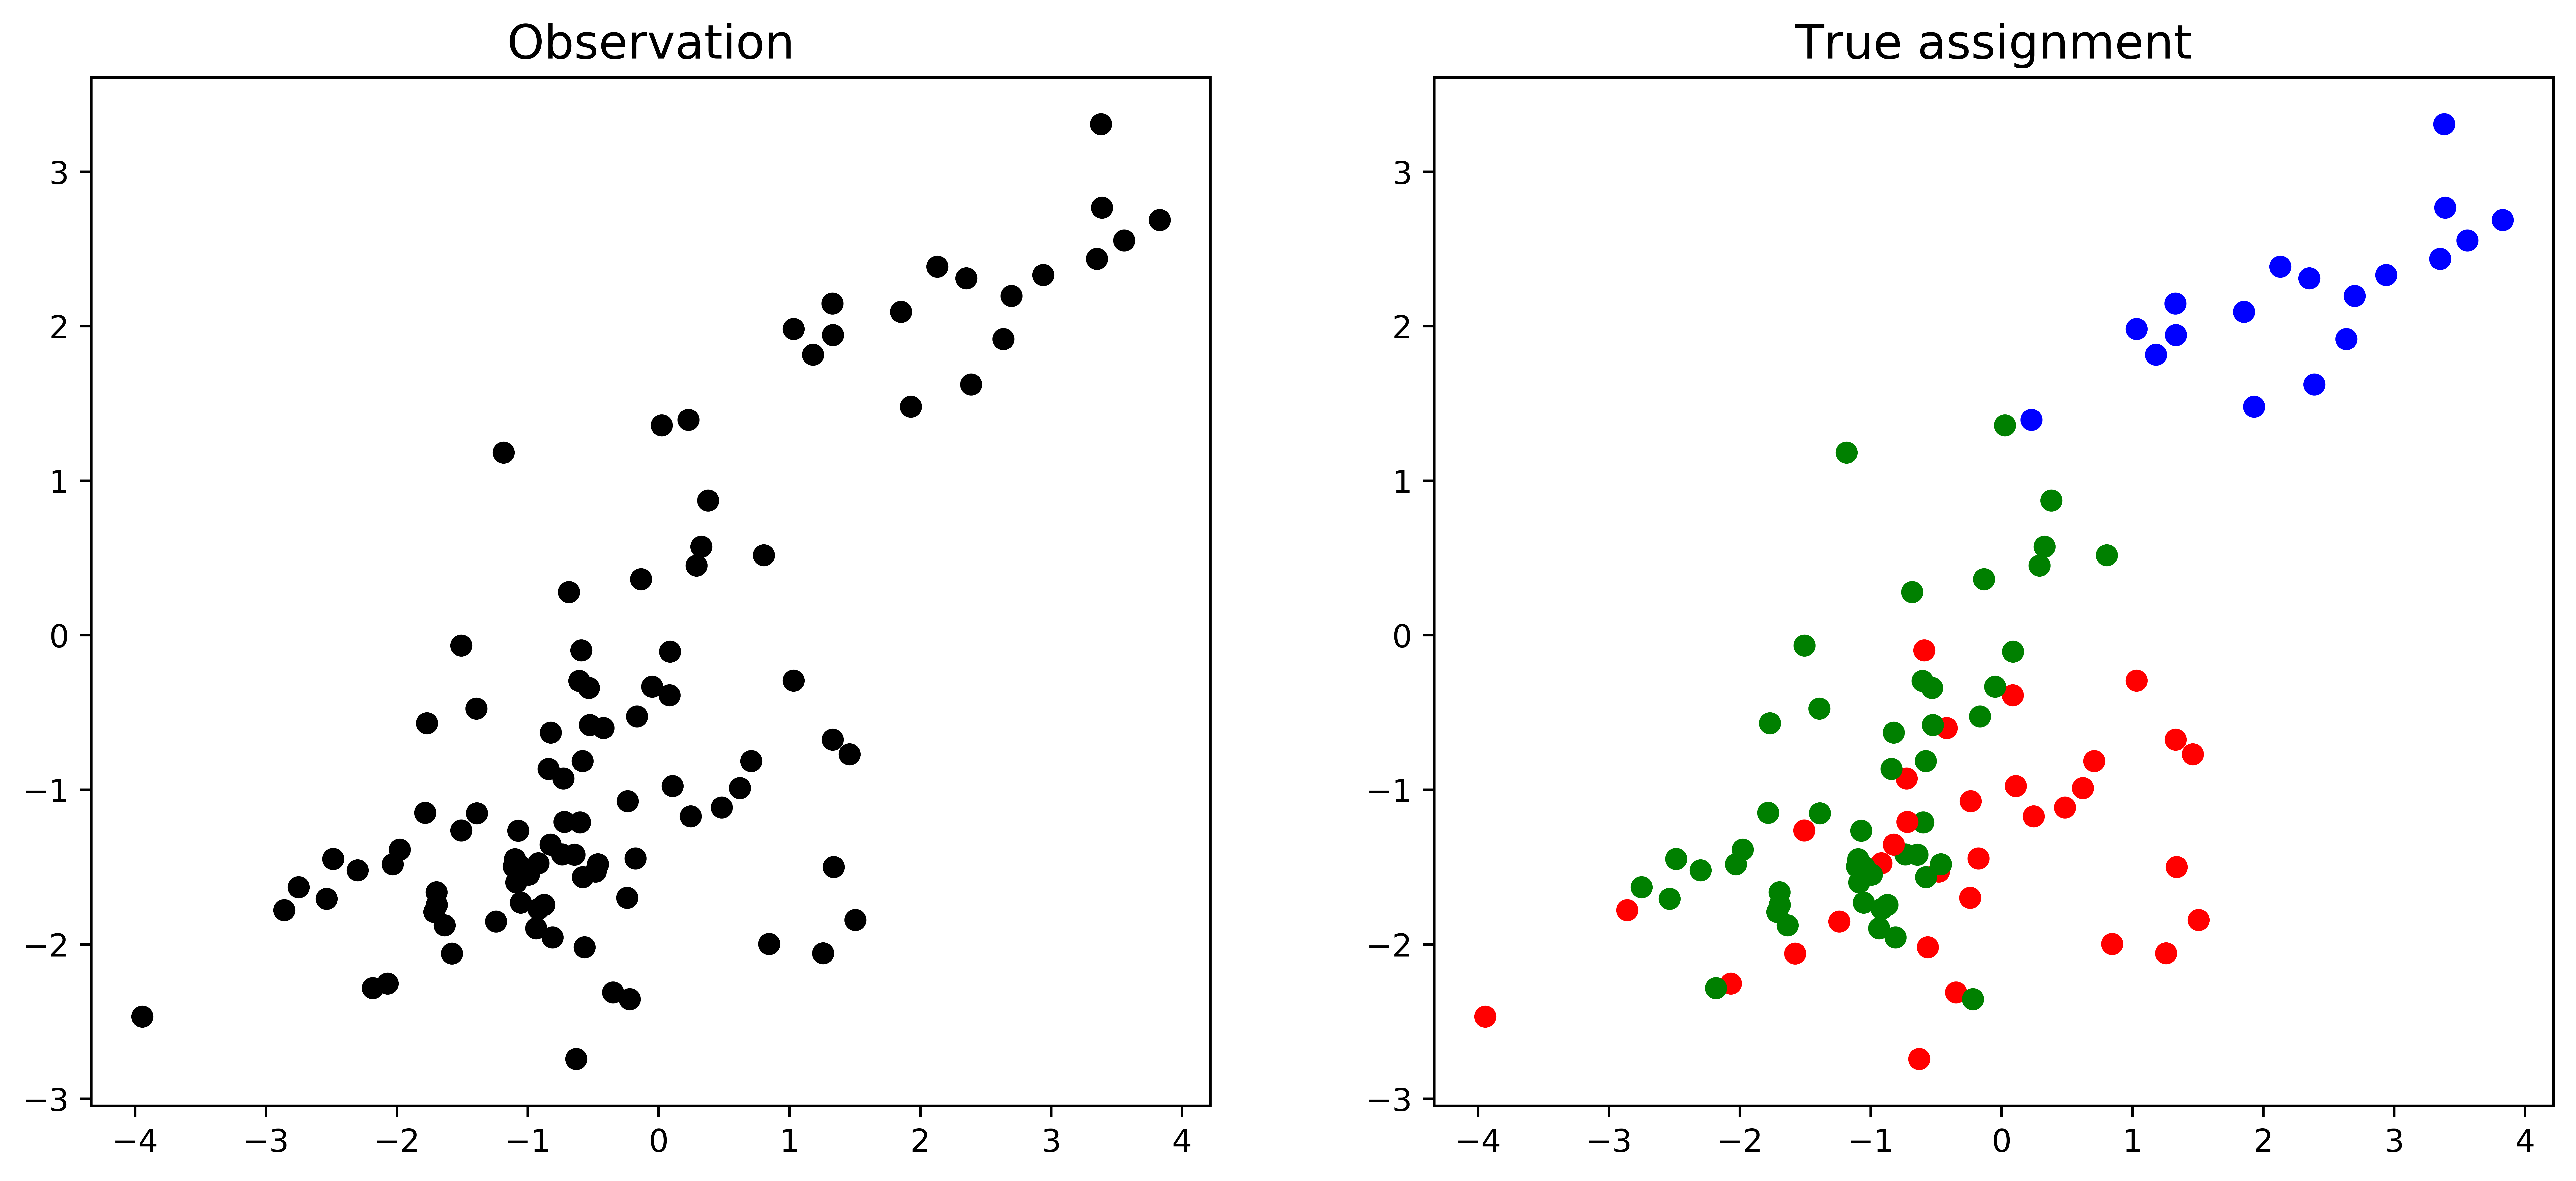

In [ ]:
# plot generated data

plt.figure(1,figsize=(14,6),dpi=900)

#우리가 실제 들고 있는 데이터는 이럼. 이 데이터 어디서부터 왔는지 모름. (unsupervised learning 하고 있으니까)
plt.subplot(121)
plt.title('Observation',fontsize=15)
plt.plot(data[:,0],data[:,1],'ko')

plt.subplot(122)
plt.title('True assignment',fontsize=15)
for i in range(N):
    plt.plot(data[i,0],data[i,1],'o',c=cols[int(data[i,2])])

plt.show()

In [ ]:
# k-means clustering is based on Euclidean distance

def distance(x1,x2):
    #### HERE ####
    return

In [ ]:
# assume k=5 clusters

k = 5
itrEM = 128 #128번의 update 진행 예정
showVisualization = [1,3,7,15,31,63,127] #iteration 내에서 visualize

In [ ]:
# set-up numpy zero tables
# you need to complete the following variables in this implementation (매 step마다 구해야하는 것)

centroid = np.zeros((itrEM,k,2)) #각 iteration마다 5개의 centroid 좌표 어디있는지
sumDistance = np.zeros(itrEM-1) #각 iteration마다 total distance
assignment = np.zeros(N,dtype=np.int64) #각 데이터가 어느 cluster에 assign 되어 있는지

In [ ]:
# randomly intialize centroids with std. Gaussian
# but you can also use initial centroids by choosing from data instances -> 원하는 방향으로 구현

print(centroid[0,:,:].shape)
print(*centroid[0,:,:].shape) #튜플 해제

centroid[0,:,:] = np.random.randn(*centroid[0,:,:].shape)

for i in range(k):
  centroid[0,i,:] = data[i,:2]

print(centroid[0,:,:])

In [ ]:
plt.figure(1,figsize=(14,25),dpi=900)
plotN = 1
delta = 1e-10

# training starts from here

for i in range(1,itrEM): #학습 128번

    ############ E-step: update cluster assignments given centroids

    #### HERE ####

    #Find i in range(N):
    # ASDFASDF
    # distance(data,centroid)
    # for i j in range(K):
    #   distance(d,c)
    # find min-centroid and assign the index

    ############ E-step ends here

    cntGroups = np.zeros(k)+delta

    ############ M-step: update centroids given cluster assignments

    #sumDistanceCentroid = np.zeros((k,2),dtype=float)
    #for i in range(N):
    #   sumCoordinateCentroid[assignment[i]] += data[i,:2]

    #for j in range(k):
    #   new_centroid[j] = compute average for data assigned in cluster j
    #   new_centroid[j] = sumCoordinateCentroid[j]/cntGroups[j]

    ############ M-step ends here

    if i in showVisualization:
        plt.subplot(len(showVisualization),2,plotN)
        plt.title('iteration = %s'%(i),fontsize = 15)
        plotN += 1

        for j in range(k):

            points = np.zeros((int(cntGroups[j]),2))
            cntTemp = 0

            for l in range(N):
                if assignment[l] == j:
                    points[cntTemp] = data[l,:2]
                    cntTemp += 1

            plt.plot(points[:,0],points[:,1],'x',markeredgecolor=col[j],markeredgewidth=1)
            plt.plot(centroid[0:i,j,0],centroid[0:i,j,1],'ko',markeredgecolor=col[j],markerfacecolor='k')
            plt.plot(centroid[0:i,j,0],centroid[0:i,j,1],color='k')

plt.subplot(len(showVisualization),2,plotN+1)
plt.title('final = %s'%(i),fontsize = 15)
for j in range(k):
    points = np.zeros((int(cntGroups[j]),2))
    cntTemp = 0
    for l in range(N):
        if assignment[l] == j:
            points[cntTemp] = data[l,:2]
            cntTemp += 1
    plt.plot(points[:,0],points[:,1],'x',markeredgecolor=col[j],markeredgewidth=1)
    plt.plot(centroid[-1,j,0],centroid[-1,j,1],'ko',markeredgecolor=col[j],markerfacecolor='k')

plt.subplot(len(showVisualization),2,plotN+2)
plt.title('iteration vs. Sum of distance',fontsize=15)
plt.xlabel('EM Iteration',fontsize=15)
plt.ylabel('Sum of Distance',fontsize=15)
plt.plot(sumDistance[:])

plt.show()